# 1. 吸收波长数据分布（Absorption wavelength data distribution）

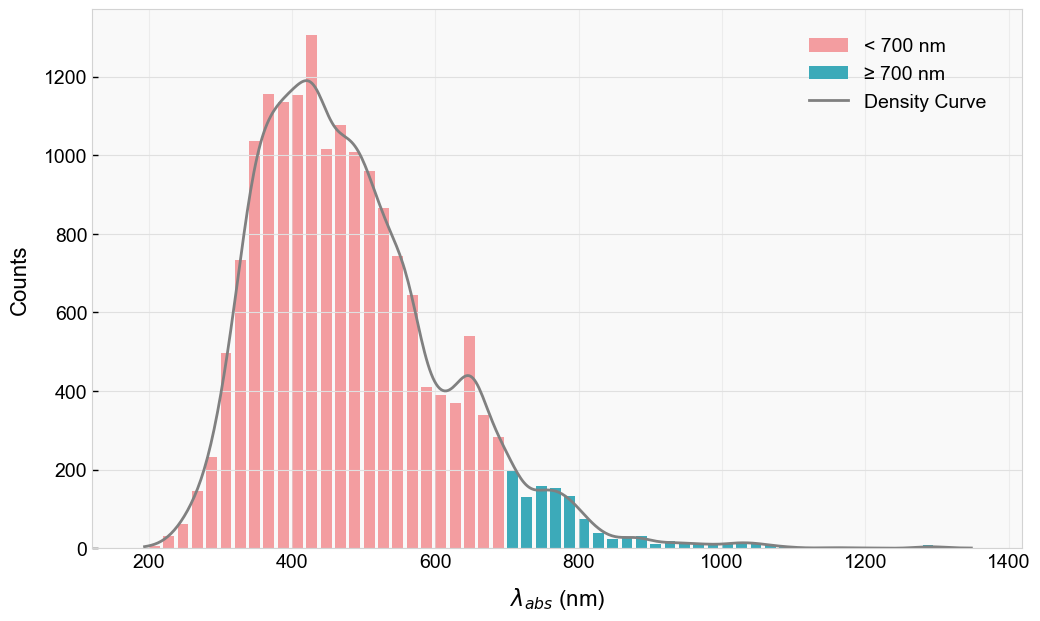

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
from scipy.stats import gaussian_kde

# 设置字体和样式
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

# Read data
df = pd.read_csv('./data/01.csv')
wavelengths = df['abs']

# 设置区间范围
bar = 20
bins = range(int(wavelengths.min()) // bar * bar, int(wavelengths.max()) // bar * bar + 40, bar)

# 创建图形并设置样式
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.set_facecolor('#F9F9F9')  # 坐标轴区域浅灰色背景
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.8)  # 浅灰色水平网格线
plt.grid(axis='x', color='#E0E0E0', linestyle='-', linewidth=0.8, alpha=0.5)  # 浅灰色垂直网格线(更淡)

# 数据分组
wavelengths_lte_700 = wavelengths[wavelengths < 700]
wavelengths_gt_700 = wavelengths[wavelengths >= 700]

# 绘制条形图
n1, bins1, patches1 = plt.hist(wavelengths_lte_700, bins=bins, edgecolor='none', alpha=1, width=15, color='#F39DA0', label='< 700 nm')
n2, bins2, patches2 = plt.hist(wavelengths_gt_700, bins=bins, edgecolor='none', alpha=1, width=15, color='#3caab9', label='≥ 700 nm')

# 计算并绘制拟合曲线 (KDE核密度估计)
kde = gaussian_kde(wavelengths)
x = np.linspace(wavelengths.min(), wavelengths.max(), 500)
y = kde(x) * len(wavelengths) * bar  # 缩放以匹配柱状图高度
plt.plot(x, y, color='gray', linewidth=2, linestyle='-', label='Density Curve')

# 添加标题和标签
plt.xlabel('$\lambda_{abs}$ (nm)', labelpad=10, fontsize=16)
plt.ylabel('Counts', labelpad=10, fontsize=16)
plt.tick_params(axis='x', length=0, width=1)
plt.tick_params(axis='y', direction='in', length=4, width=1)

# 优化图例 - 放置在图表内部右上角
plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# 调整边框为浅灰色
for spine in ax.spines.values():
    spine.set_visible(True)  # 显示所有边框
    spine.set_color('#D3D3D3')  # 浅灰色边框
    spine.set_linewidth(0.8)  # 边框线宽

plt.savefig('./figure/1_abs_分布.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

# 2. t-SNE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# 读取CSV文件
df = pd.read_csv('./data/02.csv')

# 提取分子指纹和标签column
fingerprints = df.iloc[:, 3:].values  # 从第4column到最后一column是分子指纹
labels = df.iloc[:, 2].values  # 第3column是标签（0和1）

# 使用t-SNE进行三维降维
tsne = TSNE(n_components=3, perplexity=10, random_state=42)  # 设置三维降维
tsne_results_3d = tsne.fit_transform(fingerprints)

E:\Anaconda\envs\dye37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\Anaconda\envs\dye37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


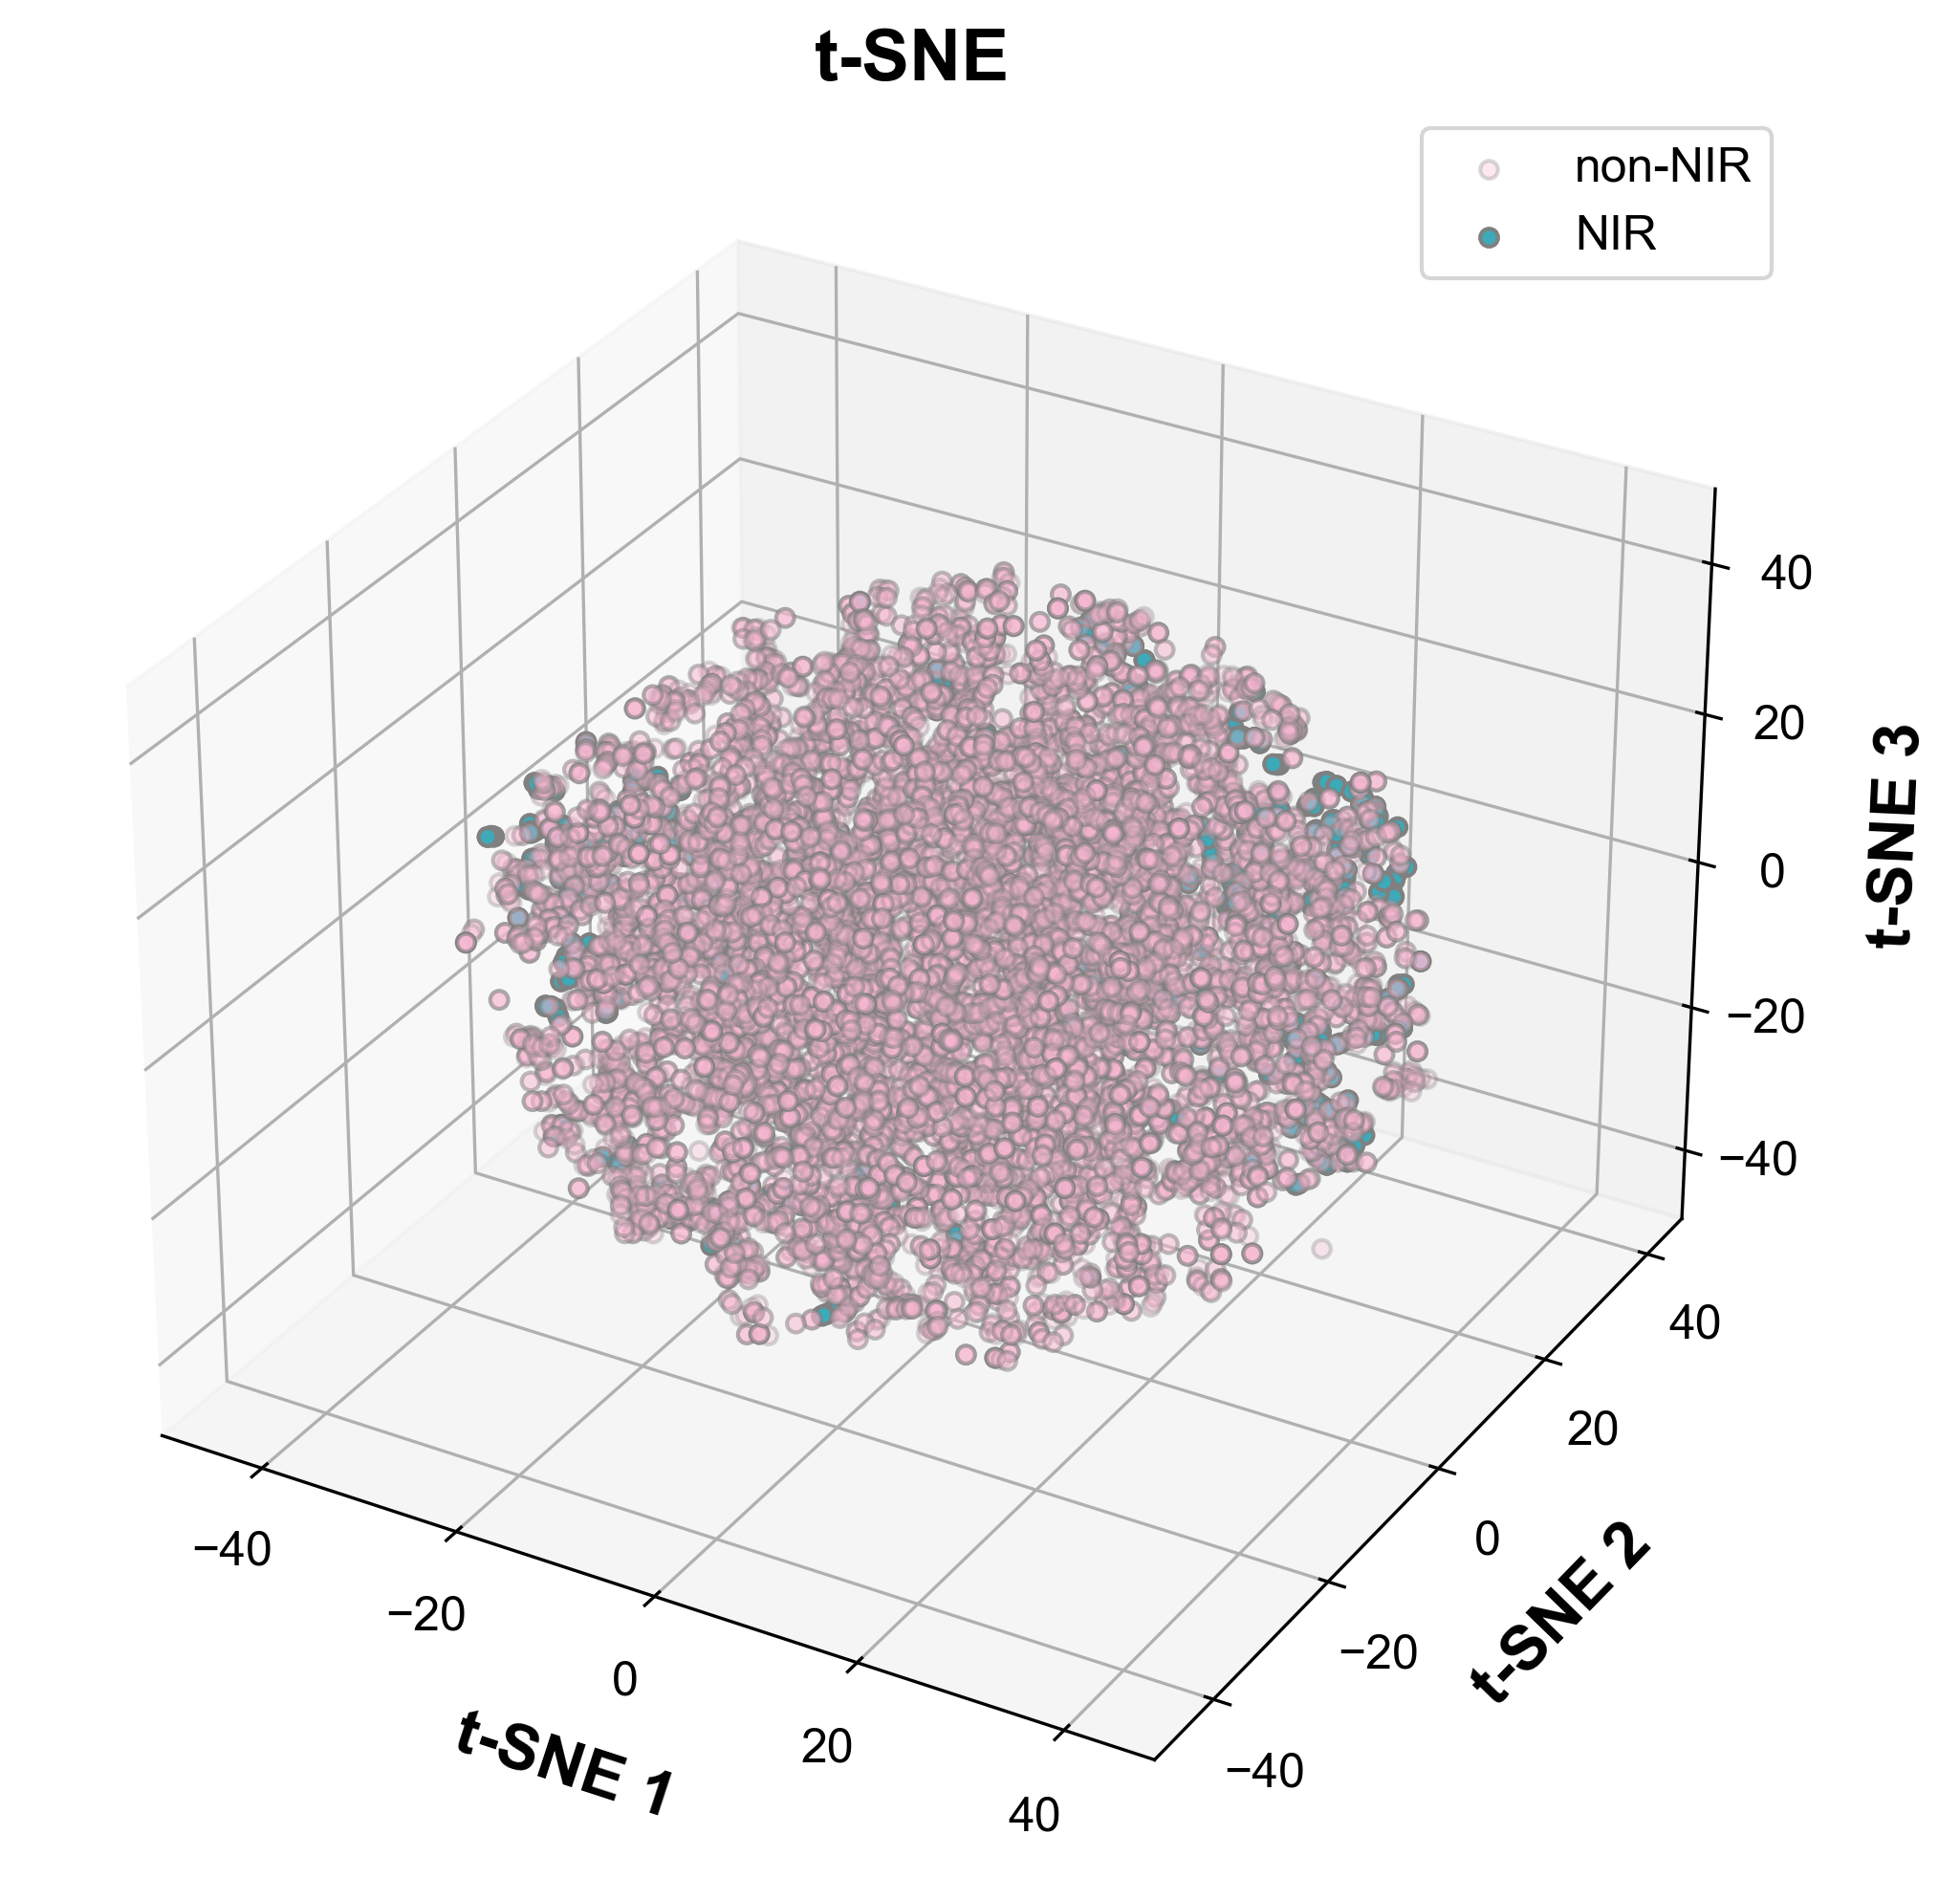

In [3]:
# 将降维结果保存到DataFrame
tsne_df = pd.DataFrame(data=tsne_results_3d, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])

# 标签映射：0 -> Low_abs, 1 -> High_abs
label_mapping = {0: 'non-NIR', 1: 'NIR'}
tsne_df['Label'] = pd.Series(labels).map(label_mapping)

# 自定义颜色、形状和大小
palette = {'non-NIR': '#F7B7D2', 'NIR': '#3caab9'}  # 自定义颜色
marker_styles = {'non-NIR': 'o', 'NIR': 'o'}  # 自定义标记形状
sizes = {'non-NIR': 20, 'NIR': 20}  # 点的大小
alphas = {'non-NIR': 0.3, 'NIR': 1}  # 不同标签的透明度

# 绘制3D t-SNE图
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# 根据标签绘制不同的散点
for label in ['non-NIR', 'NIR']:
    subset = tsne_df[tsne_df['Label'] == label]
    ax.scatter(
        subset['TSNE-1'], subset['TSNE-2'], subset['TSNE-3'],
        label=label,
        color=palette[label],
        s=sizes[label],
        marker=marker_styles[label],
        alpha=alphas[label]
        , edgecolor='gray'
    )

# 设置标题和标签
ax.set_title('t-SNE', fontsize=18, fontweight='bold')
ax.set_xlabel('t-SNE 1', fontsize=16, labelpad=10, fontweight='bold')
ax.set_ylabel('t-SNE 2', fontsize=16, labelpad=10, fontweight='bold')
ax.set_zlabel('t-SNE 3', fontsize=16, labelpad=10, fontweight='bold')

# 设置刻度大小
ax.tick_params(axis='both', which='both', labelsize=12)

# 显示图例
ax.legend(title='', loc='best', fontsize=12)

# 保存图像
plt.savefig('./figure/02_tsne_3D.png', dpi=600, bbox_inches='tight', format='png')

# 显示图表
plt.show()


# 3. 骨架数量统计（Scaffold count analysis）

【统计结果】每个tag_name中label 0和1的数量（None在最后）：
--------------------------------------------------
label              0    1
scaffold                 
5n6              912   19
5p6             2431  115
6n6             1406   57
6p6              845   42
Acridines        933   21
Azo               38    0
BODIPY          1324  202
Benz             689   10
Carbazole       1240   17
Coumarin         696   83
Cyanine          584  396
Naphthalimide    255    2
PAHs            1631   52
Porphyrin        297   24
SquaricAcid      280   40
Triphenylamine  2447    7
None             136    9
Label 0 总数量: 16144
Label 1 总数量: 1096



E:\Anaconda\envs\dye37\lib\site-packages\ipykernel_launcher.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator


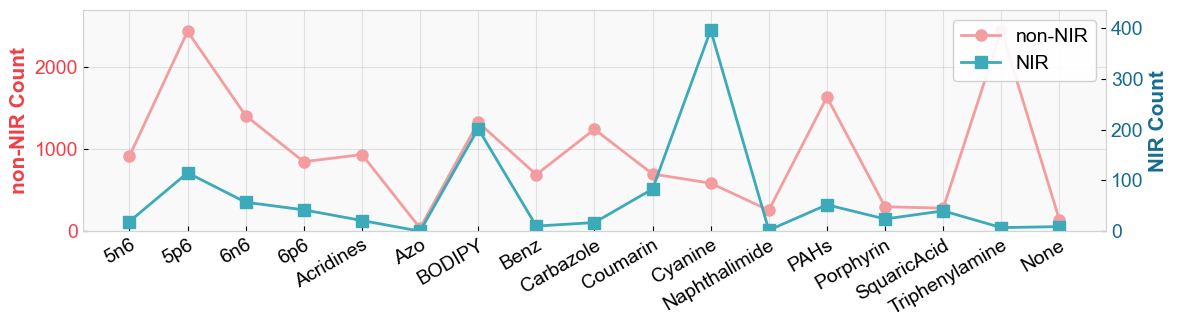

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. 读取CSV文件
df = pd.read_csv('./data/03.csv')

# 2. 统计每个tag_name中label 0和1的数量
counts = df.groupby(['scaffold', 'label']).size().unstack(fill_value=0)
counts = counts.reindex(columns=[0, 1], fill_value=0)

# 3. 将"None"类别移到最后
if 'None' in counts.index:
    counts = pd.concat([
        counts.drop('None'),
        counts.loc[['None']]
    ])

# ==================== 打印统计结果 ====================
print("="*50)
print("【统计结果】每个tag_name中label 0和1的数量（None在最后）：")
print("-"*50)
print(counts)
print("="*50)
print(f"Label 0 总数量: {counts[0].sum()}")
print(f"Label 1 总数量: {counts[1].sum()}")
print("="*50 + "\n")

# ==================== 绘制双轴折线图 ====================
# plt.figure(figsize=(12, 4), facecolor='#F0F8FF')  # 淡蓝色背景
plt.figure(figsize=(12, 3.5))
ax = plt.gca()
ax.set_facecolor('#F9F9F9')  # 坐标轴区域淡蓝Z
# 左侧Y轴（Label 0）
ax_left = plt.gca()
line0, = ax_left.plot(
    counts.index, 
    counts[0], 
    marker='o', 
    linestyle='-', 
    color='#F39DA0', 
    label='non-NIR',
    markersize=8,
    linewidth=2
)
ax_left.set_ylabel('non-NIR Count', fontsize=15, color='#F33D45', fontweight='bold')
ax_left.tick_params(axis='y', labelcolor='#F33D45', direction='in')
ax_left.set_ylim(0, counts[0].max() * 1.1)


# 右侧Y轴（Label 1）
ax_right = ax_left.twinx()
line1, = ax_right.plot(
    counts.index, 
    counts[1], 
    marker='s', 
    linestyle='-', 
    color='#3caab9', 
    label='NIR',
    markersize=8,
    linewidth=2
)
ax_right.set_ylabel('NIR Count', fontsize=15, color='#166C8F', fontweight='bold')
ax_right.tick_params(axis='y', labelcolor='#166C8F', direction='in')
ax_right.set_ylim(0, counts[1].max() * 1.1)

# X轴设置
ax_left.tick_params(axis='x', direction='in')
ax_left.set_xticklabels(
    counts.index, 
    rotation=30, 
    ha='right', 
    rotation_mode='anchor', 
    fontsize=14
)

# 合并图例
lines = [line0, line1]
labels = [l.get_label() for l in lines]
ax_left.legend(
    lines, 
    labels, 
    loc='upper right',
    framealpha=0.9  # 图例半透明
)

# 网格线设置（浅灰色）
ax_left.grid(True, linestyle='-', alpha=0.2, color='gray')

# 边框设置
for spine in ax_left.spines.values():
    spine.set_color('#D3D3D3')  # 浅灰色边框
for spine in ax_right.spines.values():
    spine.set_color('#D3D3D3')

plt.tight_layout()

# 保存图片（保留背景色）
save_dir = 'figure'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 保存图像
plt.savefig('./figure/03_骨架统计.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

# 4. 应用域分析（Applicability domain analysis）

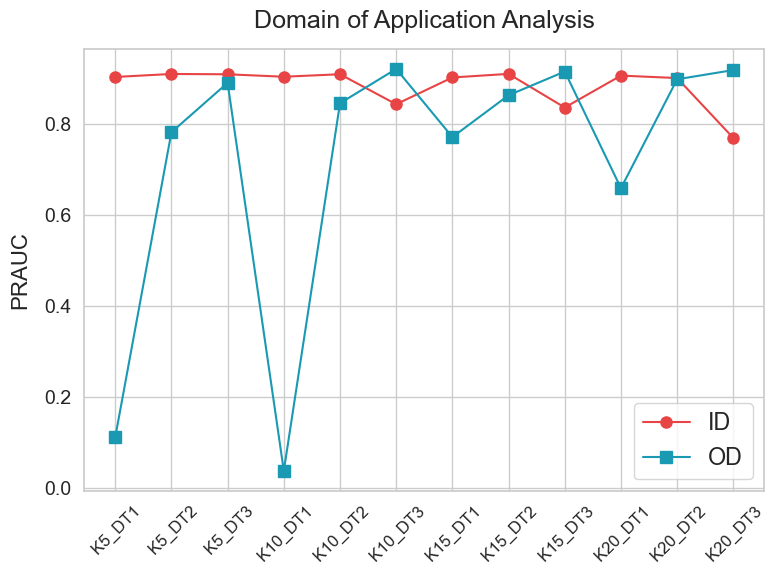

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 设置Seaborn主题样式
sns.set_theme(style="whitegrid")

# 配置字体和大小
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

# 读取CSV文件
df = pd.read_csv('./data/04.csv')  # 替换为你的CSV文件路径

# 假设第一column是模型1的得分，第二column是模型2的得分
model1_scores = df.iloc[:, 0]  # 第一column
model2_scores = df.iloc[:, 1]  # 第二column

# 创建x轴数据（比较次数）
comparisons = ['K5_DT1','K5_DT2','K5_DT3','K10_DT1','K10_DT2','K10_DT3','K15_DT1','K15_DT2','K15_DT3','K20_DT1','K20_DT2','K20_DT3',]

# 手动设置横坐标标签内容
x_labels = [f' {i}' for i in comparisons]  # 替换为你想要的标签内容

# 绘制折线图
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.plot(comparisons, model1_scores, label='ID', marker='o', color='#E84445', markersize=8)  # 设置ID节点大小为8
plt.plot(comparisons, model2_scores, label='OD', marker='s', color='#1999B2', markersize=8)  # 设置OD节点大小为8

# 添加标题和标签
plt.title('Domain of Application Analysis', pad=15)
# plt.xlabel('', labelpad=10)
plt.ylabel('PRAUC', labelpad=10, fontsize=16)

# 显示全部横坐标标签，并手动设置标签内容
plt.xticks(comparisons, x_labels, rotation=45, fontsize=12)  # rotation用于旋转标签，避免重叠

# 放大图例
plt.legend(fontsize='large')  # 调整图例字体大小
plt.grid(True)  # 添加网格线

# 显示图表
plt.tight_layout()
plt.savefig('./figure/04_domain.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

# 5. 绘制气泡图（Bubble plot）

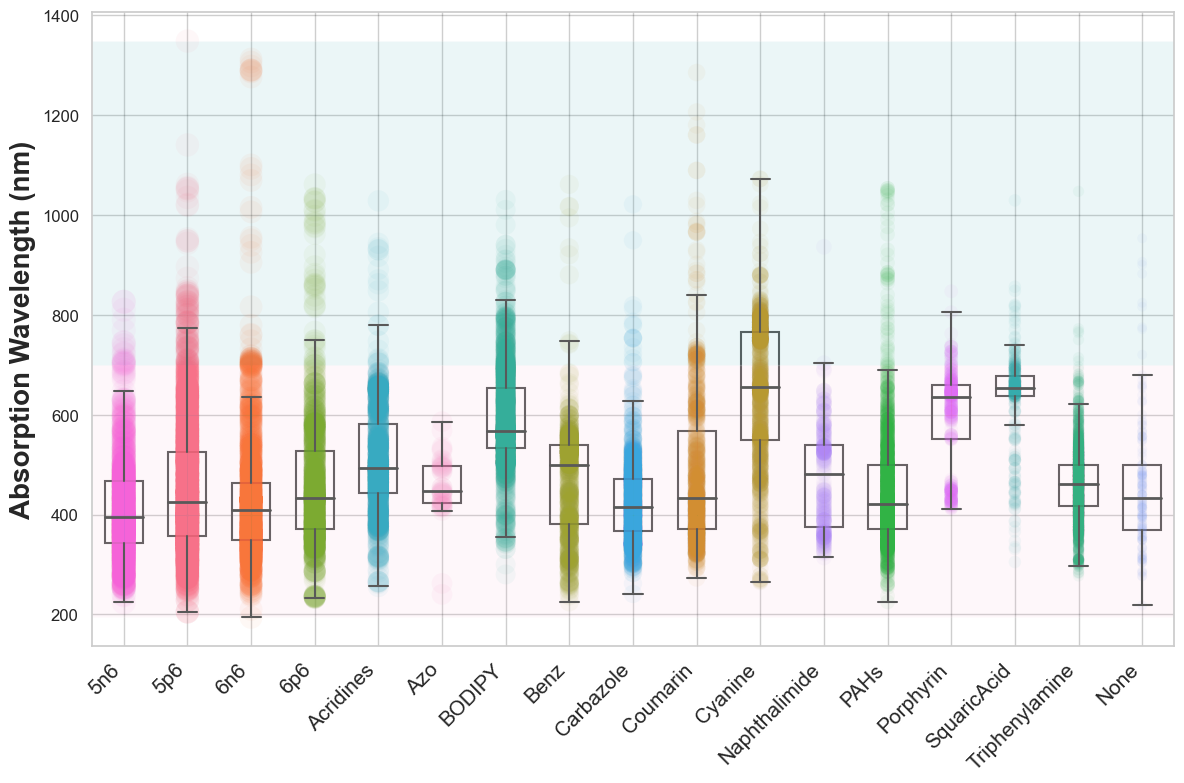

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 保持气泡图原始样式设置
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Read data
df = pd.read_csv("./data/03.csv")

# 确保数据column存在
if 'scaffold' not in df.columns or 'abs' not in df.columns:
    raise ValueError("CSV文件必须包含'scaffold'和'abs'column")

# 定义骨架顺序
custom_order = [
    "5n6", "5p6", "6n6", "6p6", 
    "Acridines", "Azo", "BODIPY", "Benz", 
    "Carbazole", "Coumarin", "Cyanine", "Naphthalimide", 
    "PAHs", "Porphyrin", "SquaricAcid", "Triphenylamine", "None"
]

# 转换为分类变量
df['scaffold'] = pd.Categorical(df['scaffold'], categories=custom_order, ordered=True)

# 统计分子数量
scaffold_counts = df['scaffold'].value_counts()
df['scaffold_count'] = df['scaffold'].map(scaffold_counts)

# 创建颜色映射
unique_scaffolds = df['scaffold'].unique()
palette = sns.color_palette("husl", n_colors=len(unique_scaffolds))
color_map = dict(zip(unique_scaffolds, palette))

# 创建图形 - 保持原始尺寸
plt.figure(figsize=(12, 8))
ax = plt.gca()

# 绘制背景区域 - 保持原始样式
ymin, ymax = df['abs'].min(), df['abs'].max()
ax.axhspan(ymin=ymin, ymax=700, facecolor='#F7B7D2', alpha=0.1, zorder=1)
ax.axhspan(ymin=700, ymax=ymax, facecolor='#3caab9', alpha=0.1, zorder=1)

# 绘制气泡图 - 完全保持原始参数
sns.scatterplot(
    data=df,
    x='scaffold',
    y='abs',
    hue='scaffold',
    palette=color_map,
    size='scaffold_count',
    sizes=(50, 300),
    alpha=0.05,
    edgecolor='face',
    linewidth=0,
    legend=False,
    zorder=3
)

# 添加箱型图 - 使用透明底色和浅灰色边框
boxprops = dict(linestyle='-', linewidth=1.5, edgecolor='#595959', facecolor=(1,1,1,0.3))
medianprops = dict(linestyle='-', linewidth=2, color='#595959')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='#595959')
capprops = dict(linestyle='-', linewidth=1.5, color='#595959')

sns.boxplot(
    data=df,
    x='scaffold',
    y='abs',
    width=0.6,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    showcaps=True,
    showfliers=False,
    saturation=1,
    zorder=10  # 确保箱型图在最上层
)

# 保持原始标签和网格样式
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel("Absorption Wavelength (nm)", fontweight='bold', fontsize=20)
plt.xlabel("")
ax.grid(True, linestyle='-', alpha=0.2, color='#0C0C0C')

# 保存和显示 - 保持原始参数
plt.tight_layout()
plt.savefig('./figure/05_scaffold_bubble_with_boxplot.png', dpi=600, bbox_inches='tight')
plt.show()

# 6. 相似性对模型的影响（mpact of similarity on model performance）

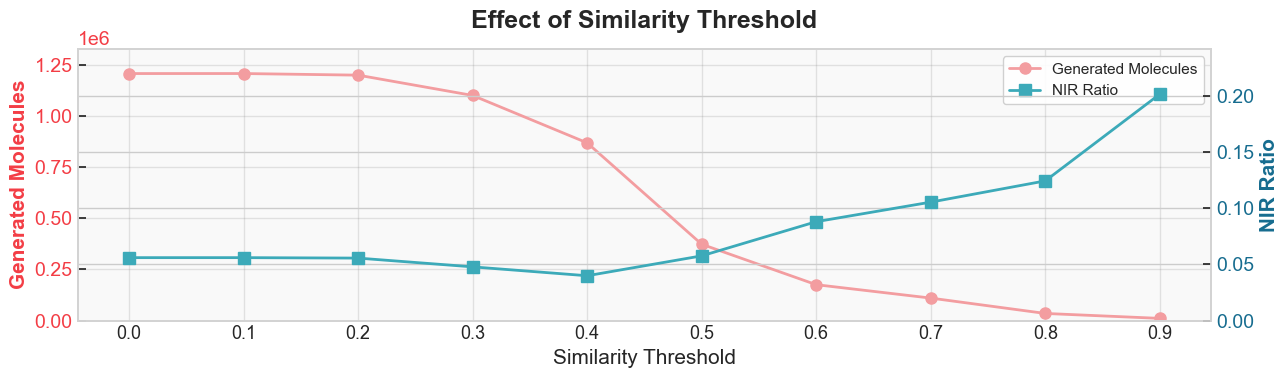

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams

# ========== 数据准备 ==========
data = {
    'Similarity': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'Generated': [1207051, 1207131, 1199263, 1100043, 868333, 372969, 175397, 109949, 34867, 10785],
    'NIR': [64046, 64043, 63247, 50243, 33309, 20309, 14191, 10488, 3854, 1809],
    'Ratio': [0.0560, 0.0560, 0.0556, 0.0478, 0.0399, 0.0576, 0.0880, 0.1054, 0.1243, 0.2015]
}
df = pd.DataFrame(data)


rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14  # 修改此处以设置整体的默认字体大小
rcParams['axes.titlesize'] = 18  # 设置标题的字体大小
rcParams['axes.labelsize'] = 14  # 设置坐标轴标签的字体大小
rcParams['xtick.labelsize'] = 14  # 设置 x 轴刻度的字体大小
rcParams['ytick.labelsize'] = 14  # 设置 y 轴刻度的字体大小


# ========== 图形配置 ==========
plt.figure(figsize=(13, 4))
ax_left = plt.gca()
ax_left.set_facecolor('#F9F9F9')  # 坐标区域背景色

# ========== 左Y轴：生成数量 ==========
line0, = ax_left.plot(
    df['Similarity'], df['Generated'],
    marker='o', linestyle='-', color='#F39DA0',
    label='Generated Molecules', markersize=8, linewidth=2
)
ax_left.set_ylabel('Generated Molecules', fontsize=15, color='#F33D45', fontweight='bold')
ax_left.tick_params(axis='y', labelcolor='#F33D45', direction='in')
ax_left.set_ylim(0, df['Generated'].max() * 1.1)

# ========== 右Y轴：NIR比例 ==========
ax_right = ax_left.twinx()
line1, = ax_right.plot(
    df['Similarity'], df['Ratio'],
    marker='s', linestyle='-', color='#3CAAB9',
    label='NIR Ratio', markersize=8, linewidth=2
)
ax_right.set_ylabel('NIR Ratio', fontsize=15, color='#166C8F', fontweight='bold')
ax_right.tick_params(axis='y', labelcolor='#166C8F', direction='in')
ax_right.set_ylim(0, df['Ratio'].max() * 1.2)

# ========== X轴设置 ==========
ax_left.set_xlabel('Similarity Threshold', fontsize=15)
ax_left.tick_params(axis='x', direction='in')
ax_left.set_xticks(df['Similarity'])
ax_left.set_xticklabels(df['Similarity'], fontsize=13)

# ========== 图例 ==========
lines = [line0, line1]
labels = [l.get_label() for l in lines]
ax_left.legend(lines, labels, loc='upper right', framealpha=0.9)

# ========== 网格 & 边框 ==========
ax_left.grid(True, linestyle='-', alpha=0.2, color='gray')
for spine in ax_left.spines.values():
    spine.set_color('#D3D3D3')
for spine in ax_right.spines.values():
    spine.set_color('#D3D3D3')

# ========== 标题 & 布局 ==========
plt.title('Effect of Similarity Threshold', fontsize=18, pad=15, fontweight='bold')
plt.tight_layout()

# ========== 保存图像 ==========
plt.savefig('./figure/06_相似性影响.png', dpi=600, bbox_inches='tight')

plt.show()
